<h2 style="text-align:center;">Emotion Classification — Happy vs Not Happy (CNN)</h2>

**Author:** Mubasshir Ahmed  
**Module:** Deep Learning — FSDS  
**Notebook:** 06_Happy_Sad_CNN_Practical_Implementation  
**Objective:** Build and train a CNN model to classify facial expressions as *Happy* or *Not Happy* using TensorFlow/Keras.


### 1️⃣ Introduction

This project demonstrates the use of **Convolutional Neural Networks (CNN)** to perform binary image classification.

The model aims to detect facial emotions by classifying images into two categories:
- 😊 **Happy**
- 😐 **Not Happy**

We’ll use a small dataset with clear folder separation for training, validation, and testing.  
CNNs are ideal for this task since they can **automatically extract features** from images such as edges, curves, and textures without manual feature engineering.


In [1]:
# 2️⃣ Import Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

print("# ➤ TensorFlow version:", tf.__version__)

# ➤ TensorFlow version: 2.20.0


In [2]:
# 3️⃣ Define Dataset Paths (Dynamic & Windows-safe)
# ➤ The notebook is already inside the dataset folder, so we only reference subdirectories.
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'training')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'testing')

print("Current working directory:", os.getcwd())
for d in [train_dir, val_dir, test_dir]:
    print(f"# ➤ {d}: {'FOUND' if os.path.exists(d) else 'MISSING'}")

Current working directory: c:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Deep_Learning\03_CNN\05_CNN_Practical_Implementation\Emotion Classification — Happy vs Not Happy (CNN)
# ➤ c:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Deep_Learning\03_CNN\05_CNN_Practical_Implementation\Emotion Classification — Happy vs Not Happy (CNN)\training: FOUND
# ➤ c:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Deep_Learning\03_CNN\05_CNN_Practical_Implementation\Emotion Classification — Happy vs Not Happy (CNN)\validation: FOUND
# ➤ c:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Deep_Learning\03_CNN\05_CNN_Practical_Implementation\Emotion Classification — Happy vs Not Happy (CNN)\testing: FOUND


### 4️⃣ Data Preprocessing and Augmentation

We’ll use the **ImageDataGenerator** class to perform on-the-fly image augmentation and rescaling.  
This helps the model generalize better by introducing slight variations in training images (rotation, zoom, flip).

In [3]:
# 4️⃣ Data Generators
IMG_SIZE = (64, 64)
BATCH_SIZE = 2  # Small dataset -> smaller batch size

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
    # validation_split=0.2  # ➤ 20% of training for validation
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

print("✅ Data generators created successfully!")

Found 12 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


Found 0 images belonging to 0 classes.
✅ Data generators created successfully!


### 5️⃣ Building the CNN Model

We’ll construct a simple yet effective CNN architecture consisting of:
- **Convolution Layers:** Feature extraction
- **Pooling Layers:** Downsampling
- **BatchNormalization:** Training stability
- **Dropout:** Regularization to avoid overfitting
- **Dense Layers:** Final classification

In [4]:
# 5️⃣ CNN Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

c:\Users\MUBASSHIR\anaconda3\envs\fsds_dl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,665 (6.20 MB)

 Trainable params: 1,625,473 (6.20 MB)

 Non-trainable params: 192 (768.00 B)

### 6️⃣ Compiling the Model

We’ll compile our CNN using:
- **Optimizer:** Adam (adaptive learning rate)
- **Loss:** Binary Crossentropy (for binary classification)
- **Metric:** Accuracy

In [5]:
# 6️⃣ Compile Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("✅ Model compiled successfully!")

✅ Model compiled successfully!


### 7️⃣ Model Training with EarlyStopping

We’ll train our CNN while monitoring the **validation loss**.  
EarlyStopping ensures training stops when performance stops improving, restoring the best weights automatically.

In [6]:
# 7️⃣ Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30


c:\Users\MUBASSHIR\anaconda3\envs\fsds_dl\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.3333 - loss: 2.1032 - val_accuracy: 0.5000 - val_loss: 1.3523
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6667 - loss: 1.9894 - val_accuracy: 0.5000 - val_loss: 1.5457
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8333 - loss: 0.8706 - val_accuracy: 0.5833 - val_loss: 0.8586
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9167 - loss: 1.2471 - val_accuracy: 0.5833 - val_loss: 0.8028
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8333 - loss: 2.7978 - val_accuracy: 0.5833 - val_loss: 0.7539
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9167 - loss: 0.8901 - val_accuracy: 0.7500 - val_loss: 0.4371
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8333 - loss: 0.3495 - val_accuracy: 0.9167 - val_loss: 0.3882
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8333 - loss: 0.3329 - val_accuracy: 0.5000 - val_loss: 0.6451
Epoch 9/30

### 8️⃣ Training Visualization

Plotting accuracy and loss helps evaluate if the model is overfitting or underfitting.

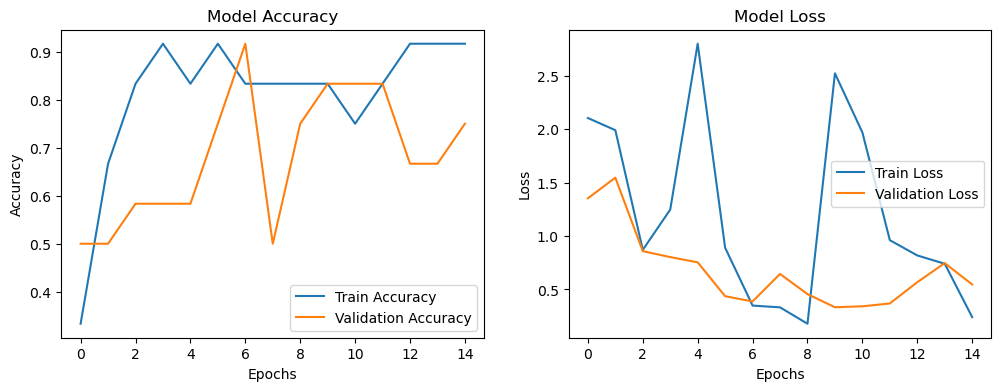

In [7]:
# 8️⃣ Plot Training Performance
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 9️⃣ Model Evaluation

Evaluate model performance on unseen test data to measure generalization ability.

In [8]:
# 9️⃣ Evaluate Model
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"🧠 Test Accuracy: {test_acc:.2f}")
print(f"📉 Test Loss: {test_loss:.2f}")

ValueError: The PyDataset has length 0

### 🔟 Visualizing Predictions

Let’s visualize a few test images with their predicted and actual labels to see how well the model performs visually.

In [ ]:
# 🔟 Sample Predictions
test_generator.reset()
preds = model.predict(test_generator, verbose=0).ravel()
pred_labels = (preds >= 0.5).astype(int)

plt.figure(figsize=(12,8))
for i in range(min(6, len(test_generator.filepaths))):
    img_path = test_generator.filepaths[i]
    img = plt.imread(img_path)
    true_label = 'Happy' if test_generator.labels[i]==1 else 'Not Happy'
    pred_label = 'Happy' if pred_labels[i]==1 else 'Not Happy'
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(f"Actual: {true_label}\nPredicted: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 1️⃣1️⃣ Saving the Model

In [ ]:
# 1️⃣1️⃣ Save Trained Model
model.save('happy_sad_cnn_model.h5')
print("✅ Model saved as happy_sad_cnn_model.h5")

### ✅ Summary & Next Steps

| Step | Description |
|------|--------------|
| Data Preprocessing | ImageDataGenerator with rescaling & augmentation |
| CNN Architecture | 2 Conv layers + Dense layers |
| Regularization | Dropout + BatchNormalization |
| Optimization | Adam |
| Loss Function | Binary Crossentropy |
| Stopping Criterion | EarlyStopping |
| Output | happy_sad_cnn_model.h5 |

**Next Steps:**
- Add more images to improve generalization.  
- Try **Transfer Learning** (VGG16, MobileNet, ResNet).  
- Deploy this model using **Streamlit** for real-time predictions.
